In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [155]:
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [156]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int64

In [157]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

In [158]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [159]:
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [160]:
penguins.groupby(y).describe().transpose()

Species                        0            1            2
CulmenLength  count   151.000000   123.000000    68.000000
              mean     38.791391    47.504878    48.833824
              std       2.663405     3.081857     3.339256
              min      32.100000    40.900000    40.900000
              25%      36.750000    45.300000    46.350000
              50%      38.800000    47.300000    49.550000
              75%      40.750000    49.550000    51.075000
              max      46.000000    59.600000    58.000000
CulmenDepth   count   151.000000   123.000000    68.000000
              mean     18.346358    14.982114    18.420588
              std       1.216650     0.981220     1.135395
              min      15.500000    13.100000    16.400000
              25%      17.500000    14.200000    17.500000
              50%      18.400000    15.000000    18.450000
              75%      19.000000    15.700000    19.400000
              max      21.500000    17.300000    20.800000
FlipperLength count   151.000000   123.000000    68.000000
              mean    189.953642   217.186992   195.823529
              std       6.539457     6.484976     7.131894
              min     172.000000   203.000000   178.000000
              25%     186.000000   212.000000   191.000000
              50%     190.000000   216.000000   196.000000
              75%     195.000000   221.000000   201.000000
              max     210.000000   231.000000   212.000000
BodyMass      count   151.000000   123.000000    68.000000
              mean   3700.662252  5076.016260  3733.088235
              std     458.566126   504.116237   384.335081
              min    2850.000000  3950.000000  2700.000000
              25%    3350.000000  4700.000000  3487.500000
              50%    3700.000000  5000.000000  3700.000000
              75%    4000.000000  5500.000000  3950.000000
              max    4775.000000  6300.000000  4800.000000

In [161]:
mean_by_target = penguins.groupby(y).transform('mean').round(1)
penguins = penguins.fillna(mean_by_target)
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,38.8,18.3,190.0,3700.7
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int64

Unique values: 164


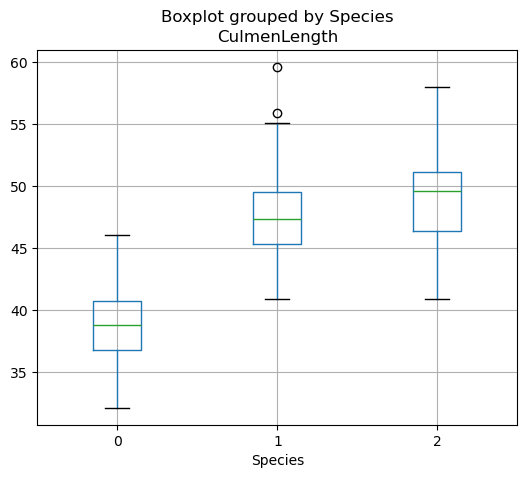

Unique values: 80


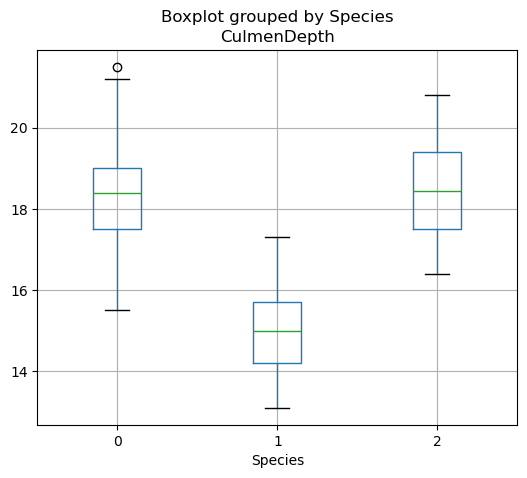

Unique values: 56


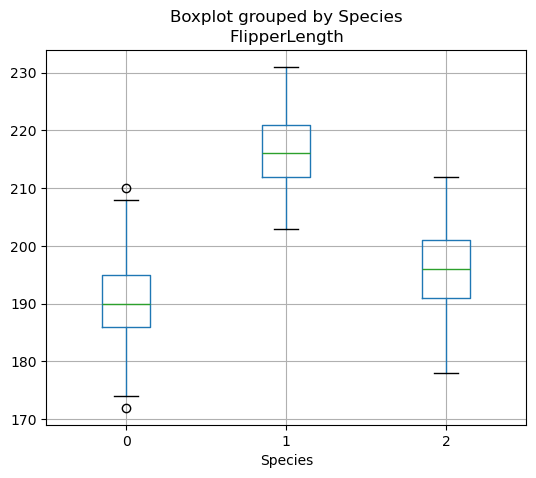

Unique values: 96


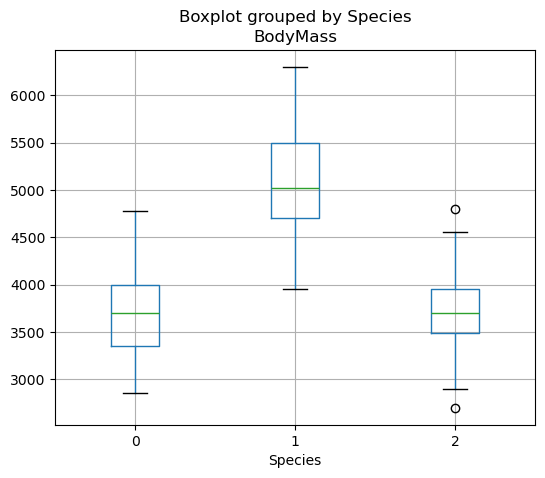

In [162]:
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

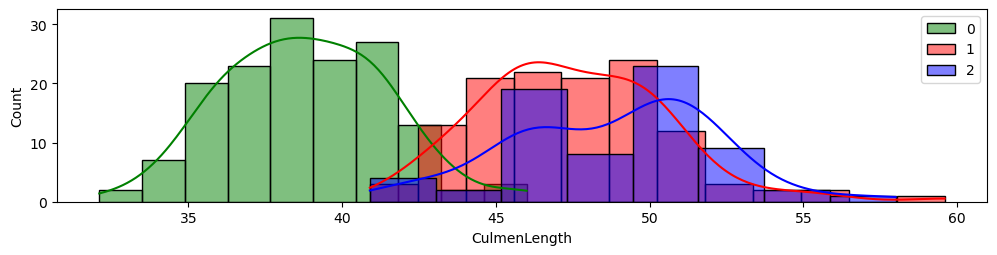

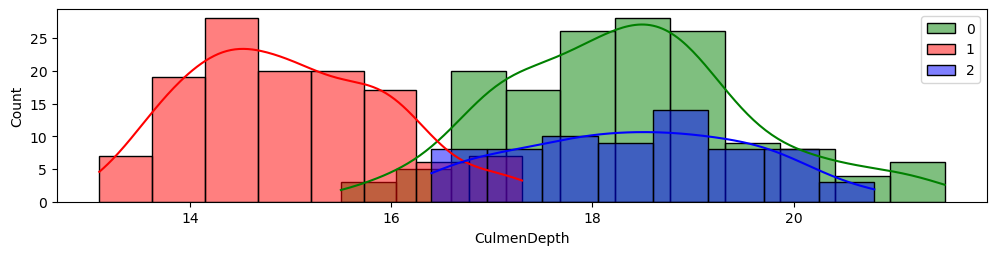

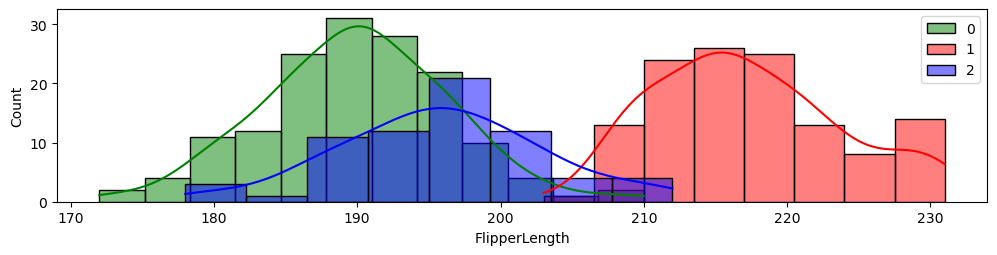

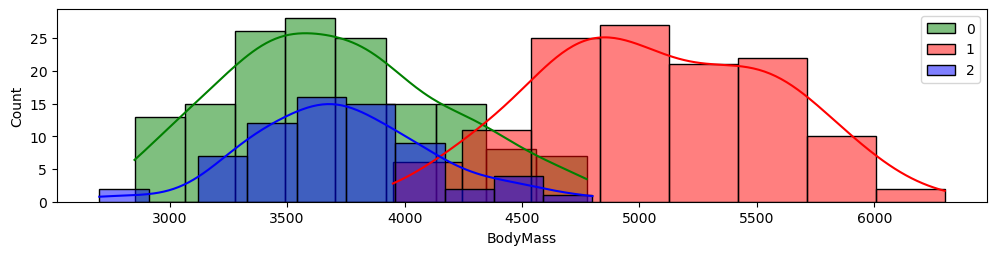

In [163]:
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='0')
    sns.histplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='1')
    sns.histplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='2')
    plt.legend(loc='upper right')
    plt.show()

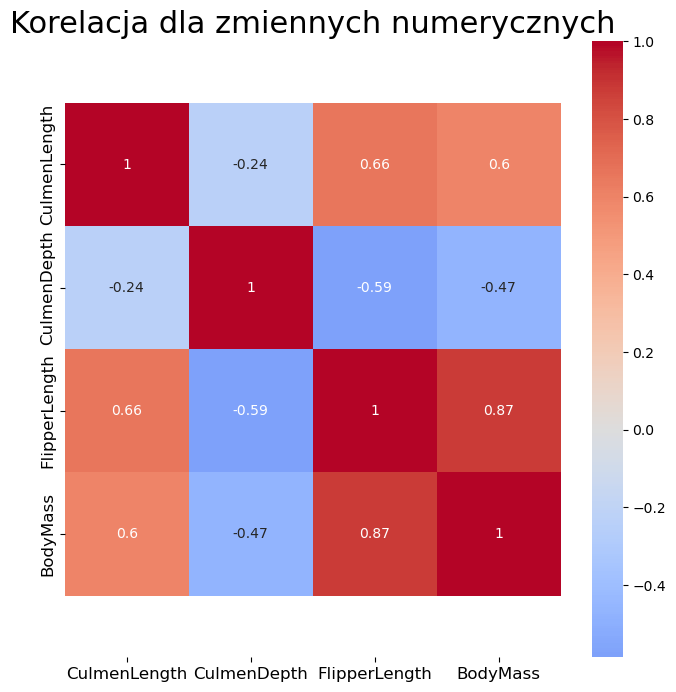

In [164]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='coolwarm',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [165]:
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.780457
FlipperLength    0.359217
BodyMass         0.211726
CulmenDepth     -0.185092
dtype: float64

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], y, test_size=0.2, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 275
Testowe obserwacje: 69


In [167]:
#Logistic Regression
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

params_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr_l1_gridsearch = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'),
                              params_lr,
                              scoring='f1_macro',
                              cv=5)
lr_l1_gridsearch.fit(X_train_standardized, y_train)
predictions_lr_l1 = lr_l1_gridsearch.predict(X_test_standardized)

print('L1:')
print('Best hyperparameter:', lr_l1_gridsearch.best_params_)
print('Mean Accuracy:', lr_l1_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_lr_l1, average='macro'))

lr_l2_gridsearch = GridSearchCV(LogisticRegression(penalty='l2'),
                              params_lr,
                              scoring='f1_macro',
                              cv=5)
lr_l2_gridsearch.fit(X_train_standardized, y_train)
predictions_lr_l2 = lr_l2_gridsearch.predict(X_test_standardized)

print('L2:')
print('Best hyperparameter:', lr_l2_gridsearch.best_params_)
print('Mean Accuracy:', lr_l2_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_lr_l2, average='macro'))

L1:
Best hyperparameter: {'C': 10}
Mean Accuracy: 0.9413628370177273
F1_score test: 0.9650793650793652
L2:
Best hyperparameter: {'C': 1}
Mean Accuracy: 0.9351603654253788
F1_score test: 0.9650793650793652


In [168]:
#KNN
knn_clf = KNeighborsClassifier()
params_knn = {'n_neighbors' : [1, 5, 10, 15, 20],
              'weights' : ['uniform', 'distance']}
knn_gridsearch = GridSearchCV(knn_clf,
                              params_knn, 
                              scoring='f1_macro',
                              cv=5)
knn_gridsearch.fit(X_train_standardized, y_train)
predictions_knn = knn_gridsearch.predict(X_test_standardized)

print('Best hyperparameter:', knn_gridsearch.best_params_)
print('Mean Accuracy:', knn_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_knn, average='macro'))

Best hyperparameter: {'n_neighbors': 5, 'weights': 'uniform'}
Mean Accuracy: 0.9470704372466919
F1_score test: 0.9828560296123126


In [169]:
#Decission Tree
tree_clf = DecisionTreeClassifier()
params_tree = {'max_depth': [1, 3, 5, 10, 15],
               'min_samples_leaf': [1, 3, 5, 10, 15]}
tree_gridsearch = GridSearchCV(tree_clf,
                               params_tree,
                               scoring='f1_macro',
                               cv=5)
tree_gridsearch.fit(X_train, y_train)
predictions_tree = tree_gridsearch.predict(X_test)

print('Best hyperparameter:', tree_gridsearch.best_params_)
print('Mean Accuracy:', tree_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_tree, average='macro'))

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 3}
Mean Accuracy: 0.9346186520164318
F1_score test: 0.9329501915708813


In [117]:
#SVM
svm_clf = SVC(probability=True)
params_svm = {'C' : [0.01, 0.1, 1, 10, 100],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_gridsearch = GridSearchCV(svm_clf,
                               params_svm,
                               scoring='f1_macro',
                               cv=5)
svm_gridsearch.fit(X_train_standardized, y_train)
predictions_svm= svm_gridsearch.predict(X_test_standardized)

print('Best hyperparameter:', svm_gridsearch.best_params_)
print('Mean Accuracy:', svm_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_svm, average='macro'))             

Best hyperparameter: {'C': 100, 'kernel': 'linear'}
Mean Accuracy: 0.9396383227688823
F1_score test: 0.9650793650793652


In [120]:
#Random Forest
rf_clf = RandomForestClassifier()
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15],
             'n_estimators': [100, 500, 1000]}
rf_gridsearch = GridSearchCV(rf_clf,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
predictions_rf= rf_gridsearch.predict(X_test)

print('Best hyperparameter:', rf_gridsearch.best_params_)
print('Mean Accuracy:', rf_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_rf, average='macro'))     

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 100}
Mean Accuracy: 0.9389356424573816
F1_score test: 0.9662835249042147


In [147]:
#AdaBoost
ab_clf = AdaBoostClassifier()
params_ab = {'estimator': [LogisticRegression(C=10, penalty='l1', solver='liblinear'), LogisticRegression(C=1, penalty='l2'), 
                           SVC(C=100, kernel='linear', probability=True)],
             'n_estimators': [100, 500, 1000]}
ab_gridsearch = GridSearchCV(ab_clf,
                             params_ab,
                             scoring='f1_macro',
                             cv=5,
                             n_jobs=-1)
ab_gridsearch.fit(X_train_standardized, y_train)
predictions_ab= ab_gridsearch.predict(X_test_standardized)

print('Best hyperparameter:', ab_gridsearch.best_params_)
print('Mean Accuracy:', ab_gridsearch.best_score_)
print("F1_score test:", f1_score(y_test, predictions_ab, average='macro'))  

Best hyperparameter: {'estimator': LogisticRegression(C=10, penalty='l1', solver='liblinear'), 'n_estimators': 100}
Mean Accuracy: 0.9331648184886554
F1_score test: 0.9650793650793652


In [153]:
#Ensembling 
v_clf = VotingClassifier(estimators=[('Tree', tree_gridsearch),
                                     ('Random Forest', rf_gridsearch),
                                     ('AdaBoost', ab_gridsearch)],
                         voting='soft')

v_clf.fit(X_train, y_train)

predictions_v_train= v_clf.predict(X_train)
predictions_v_test= v_clf.predict(X_test)

print("F1_score train:", f1_score(y_train, predictions_v_train, average='macro'))
print("F1_score test:", f1_score(y_test, predictions_v_test, average='macro'))     

F1_score train: 0.971626526023511
F1_score test: 0.9329501915708813
